#   Species classification
#### About the firm :
Maple Leaves Ltd is a start-up company which makes herbs from different types of plants and its leaves. Currently the system they use to classify the trees which they import in a batch is quite manual. A labourer from his experience decides the leaf type and subtype of plant family. They have asked us to automate this process and remove any manual intervention from this process.
#### Dataset : 
training : https://drive.google.com/file/d/1o6PRJuZ_O4sVnkciutheEfhcr5YY7BVN/view?usp=sharing

test: https://drive.google.com/file/d/1ieB7nlRP4CxkqVBwbsXZI7l-8UhPf-Ss/view?usp=sharing
#### Objective:
 To classify the plant leaves by various classifiers from different metrics of the leaves and to choose the best classifier for future reference.

In [1]:
#importing packages, algorithms, and other metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression ,LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import joblib # for saving the model

## Step -1 : Data exploration and cleaning

In [2]:
train = pd.read_csv(r'C:\Users\Rishabh Gupta\Downloads\train.csv')
test =  pd.read_csv(r'C:\Users\Rishabh Gupta\Downloads\test.csv')

In [3]:
print(train.shape) 
print(test.shape) 

(990, 194)
(594, 193)


train_data :990 datapoints with 194 features,
test_data : 594 data points with 193 features

In [4]:
train.info()
test.info()
# 99% variabels are float in nature, only the target variable has a object nature

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Columns: 194 entries, id to texture64
dtypes: float64(192), int64(1), object(1)
memory usage: 1.5+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Columns: 193 entries, id to texture64
dtypes: float64(192), int64(1)
memory usage: 895.8 KB


In [5]:
#no null values in train
print(train.isnull().sum())
#no null values in test too
print(train.isnull().sum())

id           0
species      0
margin1      0
margin2      0
margin3      0
            ..
texture60    0
texture61    0
texture62    0
texture63    0
texture64    0
Length: 194, dtype: int64
id           0
species      0
margin1      0
margin2      0
margin3      0
            ..
texture60    0
texture61    0
texture62    0
texture63    0
texture64    0
Length: 194, dtype: int64


In [6]:
#peek at the data
train.head(5)
# ALL numerical values are lying near to zero

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


In [7]:
#peek at the test data
test.head(5)
# all variables seems to be having low values(that is less than 1)

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,4,0.019531,0.009766,0.078125,0.011719,0.003906,0.015625,0.005859,0.0,0.005859,...,0.006836,0.000000,0.015625,0.000977,0.015625,0.0,0.0,0.000000,0.003906,0.053711
1,7,0.007812,0.005859,0.064453,0.009766,0.003906,0.013672,0.007812,0.0,0.033203,...,0.000000,0.000000,0.006836,0.001953,0.013672,0.0,0.0,0.000977,0.037109,0.044922
2,9,0.000000,0.000000,0.001953,0.021484,0.041016,0.000000,0.023438,0.0,0.011719,...,0.128910,0.000000,0.000977,0.000000,0.000000,0.0,0.0,0.015625,0.000000,0.000000
3,12,0.000000,0.000000,0.009766,0.011719,0.017578,0.000000,0.003906,0.0,0.003906,...,0.012695,0.015625,0.002930,0.036133,0.013672,0.0,0.0,0.089844,0.000000,0.008789
4,13,0.001953,0.000000,0.015625,0.009766,0.039062,0.000000,0.009766,0.0,0.005859,...,0.000000,0.042969,0.016602,0.010742,0.041016,0.0,0.0,0.007812,0.009766,0.007812


In [8]:
#knowing about the train dataset
train.describe()

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
count,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,...,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000
mean,799.595960,0.017412,0.028539,0.031988,0.023280,0.014264,0.038579,0.019202,0.001083,0.007167,...,0.036501,0.005024,0.015944,0.011586,0.016108,0.014017,0.002688,0.020291,0.008989,0.019420
std,452.477568,0.019739,0.038855,0.025847,0.028411,0.018390,0.052030,0.017511,0.002743,0.008933,...,0.063403,0.019321,0.023214,0.025040,0.015335,0.060151,0.011415,0.039040,0.013791,0.022768
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,415.250000,0.001953,0.001953,0.013672,0.005859,0.001953,0.000000,0.005859,0.000000,0.001953,...,0.000000,0.000000,0.000977,0.000000,0.004883,0.000000,0.000000,0.000000,0.000000,0.000977
50%,802.500000,0.009766,0.011719,0.025391,0.013672,0.007812,0.015625,0.015625,0.000000,0.005859,...,0.004883,0.000000,0.005859,0.000977,0.012695,0.000000,0.000000,0.003906,0.002930,0.011719
75%,1195.500000,0.025391,0.041016,0.044922,0.029297,0.017578,0.056153,0.029297,0.000000,0.007812,...,0.043701,0.000000,0.022217,0.009766,0.021484,0.000000,0.000000,0.023438,0.012695,0.029297
max,1584.000000,0.087891,0.205080,0.156250,0.169920,0.111330,0.310550,0.091797,0.031250,0.076172,...,0.429690,0.202150,0.172850,0.200200,0.106450,0.578130,0.151370,0.375980,0.086914,0.141600



a) The mean value exceeds 50% value for most of the feature variables, it means that the features are rightly skewed with  most values lying to the right side of the tail.


b) The 75 % and max values are different by great extent. This signifies the presence of outliers in the data

In [9]:
#look at the correlation
pd.set_option ("display.max_columns", 194)
pd.set_option("display.max_rows",194)
#takes care of correlation between numerical variables
cor = train.corr()

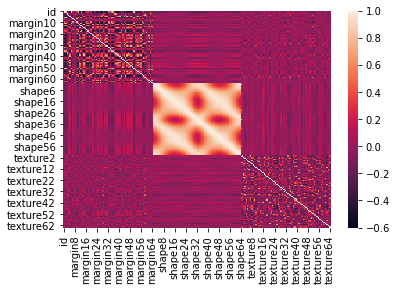

In [10]:
# visualization of the correlation 
sns.heatmap(cor)


a) Most of the boxes in the heatmap are purple implying that they have correlation close to zero.

b) The " shapes" features are moderate to high correlated with each other


In [11]:
# counting of margin1:
train.groupby('margin1').size()[:5]
#magins are close to zero with 0 margin1 occuring maximum number of times

margin1
0.000000    203
0.001953    105
0.003906     61
0.005859     51
0.007812     47
0.009766     41
0.011719     39
0.013672     33
0.015625     33
0.017578     33
0.019531     26
0.021484     26
0.023438     23
0.025391     26
0.027344     18
0.029297     17
0.031250     11
0.033203     15
0.035156     12
0.037109     14
0.039062     11
0.041016     10
0.042969      9
0.044922      5
0.046875     10
0.048828      6
0.050781     15
0.052734     13
0.054688      5
0.056641     10
0.058594      6
0.060547     15
0.062500      6
0.064453      7
0.066406      2
0.068359      6
0.070312      2
0.072266      4
0.074219      1
0.076172      2
0.078125      2
0.080078      3
0.082031      3
0.083984      1
0.085938      1
0.087891      1
dtype: int64

In [12]:
#Encoding the species categorical variable
le = LabelEncoder()
species = le.fit_transform(train['species'])
train['species'] = species
train.species.value_counts()
#there are 99 categories with a frequency of 10 each

0     10
74    10
72    10
71    10
70    10
69    10
68    10
67    10
66    10
65    10
64    10
63    10
62    10
61    10
60    10
59    10
58    10
57    10
56    10
55    10
54    10
53    10
52    10
73    10
75    10
50    10
76    10
97    10
96    10
95    10
94    10
93    10
92    10
91    10
90    10
89    10
88    10
87    10
86    10
85    10
84    10
83    10
82    10
81    10
80    10
79    10
78    10
77    10
51    10
49    10
1     10
24    10
22    10
21    10
20    10
19    10
18    10
17    10
16    10
15    10
14    10
13    10
12    10
11    10
10    10
9     10
8     10
7     10
6     10
5     10
4     10
3     10
2     10
23    10
25    10
48    10
26    10
47    10
46    10
45    10
44    10
43    10
42    10
41    10
40    10
39    10
38    10
37    10
36    10
35    10
34    10
33    10
32    10
31    10
30    10
29    10
28    10
27    10
98    10
Name: species, dtype: int64

## Step-2 Visualization

Text(-12.325000000000003, 0.5, 'shape2')

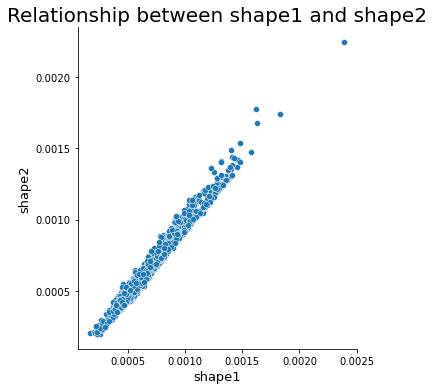

In [45]:
#see how species varies with shape1 and shape2
sns.relplot(x='shape1',y='shape2',data= train)
plt.title("Relationship between shape1 and shape2",fontsize=20)
plt.xlabel('shape1',fontsize=13)
plt.ylabel('shape2',fontsize=13)

A strong link between shape1 and shape2 (a positive one which a rise in shape1 is observed along with a rise in shape2)

Text(0.42499999999999716, 0.5, 'margin1')

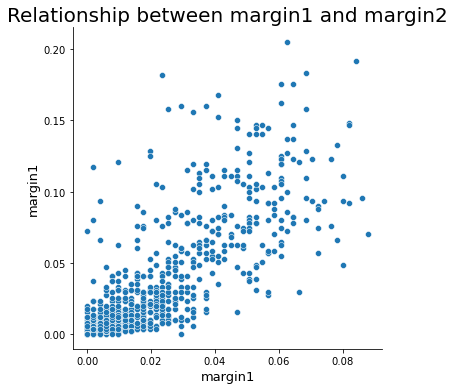

In [44]:
#relationship between  margin1 and margin2
sns.relplot(x='margin1',y='margin2',data=train)
plt.title("Relationship between margin1 and margin2",fontsize=20)
plt.xlabel('margin1',fontsize=13)
plt.ylabel('margin1',fontsize=13)

The features, margin1 and margin2, are positively linear correlated but not as much less to that of the shape1 and shape2

Text(0.5, 6.79999999999999, 'textr')

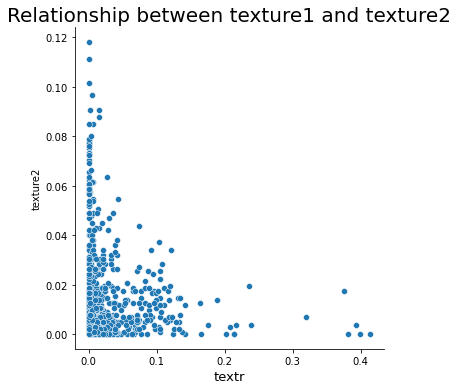

In [42]:
#relationship between texture1 and texture2:
sns.relplot(x='texture1',y='texture2',data=train)
plt.title("Relationship between texture1 and texture2",fontsize=20)
plt.xlabel('textr',fontsize=13)

There lacks any relationship between texture1 and texture2

#### USE PCA  to lower the dimensionality of the variables
We have about 192 features which increases the complexibty of the model
So, we will use principal component analysis (PCA) which  is a technique for reducing the dimensionality of such datasets, increasing interpretability but at the same time minimizing information loss. It does so by creating new uncorrelated variables that successively maximize variance.

In [15]:
#train data
X1 = train.drop(['species','id'],axis =1) # dropping id as it seems to have no role in determining the prediction
X1 = np.array(X1)
Y1 = train['species']
#with test_data
X2 = test.drop('id',axis =1)
X2 = np.array(X2) 

In [16]:
X1.shape

(990, 192)

In [17]:
# use of pca technique
pc = PCA(0.95)#get 95% variance
X1_dim= pc.fit_transform(X1)
X2_dim = pc.fit_transform(X2)

In [18]:
print(X1_dim.shape)
print(X2_dim.shape)

(990, 48)
(594, 47)


The number of features have been reduced to 48 from 194 with a miniature fall in explained variance

In [19]:
#the pca reduces the model dimensionality , but at the same time it was to able to derive 95 percen of its variability
pc.explained_variance_ratio_.sum()

0.9508292142653865

## Step 3 : Modelling

In [20]:
#train and test split
X1_train,X1_test ,Y1_train,Y1_test = train_test_split(X1_dim,Y1,test_size =0.33,random_state =2)

In [21]:
models = {'Randomforest' : RandomForestClassifier(), 'SVM' : SVC(), 'NaiveBayes': GaussianNB(), 
          'DecisionTrees' : DecisionTreeClassifier() }
accuracy1 =[]
for x in list(models.values()):
    x.fit(X1_train,Y1_train)
    accuracy1.append(x.score(X1_test,Y1_test))

In [22]:
print("The standard deviation of the accuracy is ",np.std(accuracy1) )
print("The mean of the accuracy is ",np.mean(accuracy1))
for x,y in zip(models.keys(), accuracy1): #zipping models names with their prediction
    print("The prediction of",x,"is",round(y,2))

The standard deviation of the accuracy is  0.14312776053622706
The mean of the accuracy is  0.6819571865443426
The prediction of Randomforest is 0.81
The prediction of SVM is 0.78
The prediction of NaiveBayes is 0.7
The prediction of DecisionTrees is 0.44


We know the prediction results of the different models. Out of which, the random forest shines out wth a prediction of 83 percent.
####  Now, predicting wihout any  use of PCA
Now, we will see how the above models behave when they are trained with no-PCA data

In [23]:
X1 = train.copy()
X1.drop('species',axis =1,inplace =True)
X1 = np.array(X1)
Y1 = train['species']
#with test_data
X2 = test.copy()
X2 = np.array(X2) 

In [24]:
X1_train,X1_test ,Y1_train,Y1_test = train_test_split(X1,Y1,random_state = 4,test_size =0.33)

In [25]:
models = {'Randomforest' : RandomForestClassifier(), 'SVM' : SVC(), 'NaiveBayes': GaussianNB(), 
          'DecisionTrees' : DecisionTreeClassifier() }
accuracy2 =[]
for x in list(models.values()):
    x.fit(X1_train,Y1_train)
    accuracy2.append(x.score(X1_test,Y1_test))    

In [26]:
print("The standard deviation of the accuracy is ",np.std(accuracy2) )
print("The mean of the accuracy is ",np.mean(accuracy2))
for x,y in zip(models.keys(), accuracy2): #zipping models names with their prediction
    print("The prediction of",x,"is",round(y,2))

The standard deviation of the accuracy is  0.3796269969945061
The mean of the accuracy is  0.6070336391437309
The prediction of Randomforest is 0.96
The prediction of SVM is 0.0
The prediction of NaiveBayes is 0.89
The prediction of DecisionTrees is 0.57


#### Accuracy with PCA VS Accuracy without PCA
a) The use of PCA reduces the number of featurs to 48 in training dataset.


b) The model with PCA has a higher accuracy on average along with a lesser standard deviation. So, PCA works well in giving average and stable results.

c) In both methods, random forest gives the highest level of predicition.

d) However, the random forest works much better for without pca data (that is 98 % >84 % accuracy)

e) Since our optimal model is random forest and it gets best prediction in a dataset without any dimension reductionality, We will make use of random forest without PCA.


#### Now we will use cross validation to observe any overfitting with respect to randomforest classifier

In [27]:
rf = RandomForestClassifier()
c_model = cross_val_score(rf,X1_train,Y1_train,cv = 10, scoring = "accuracy")

C:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


In [28]:
print(c_model.std())
print(c_model.mean())

0.009092737169682874
0.9728403437358661


### Intrepretation:
a)Random forest model on average predict with an accuracy of 97 percent with a standard deviation of 1 percent only.

b) This means that random forest model work wells and does not seem to overfit the training data.

## Step-4 Finalize the model

In [29]:
rf = RandomForestClassifier()
rf.fit(X1,Y1)

RandomForestClassifier()

In [30]:
#saving with joblib
filename = 'mapleprediction'
mymodel = joblib.dump(rf,filename)

In [31]:
#loading it
loaded_model = joblib.load(filename)

Predicting for the testdata with the help of the loaded model

In [32]:
Y_testset= loaded_model.predict(X2)

In [33]:
Y_test = pd.DataFrame(Y_testset)

In [34]:
test['species_prediction'] = Y_test

In [35]:
Y_test
# predicted values of the x_test

,0
0,51
1,50
2,1
3,19
4,14
...,...
589,1
590,12
591,54
592,73


##  Conclusion: 
a) the models have a better prediction when there is no dimensionality

b) random forest classifer is the best classifier with the best prediction of 96 percent, while support vending is the distant second best model

# Thanks